In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv (r"C:\Users\FARUQ\Downloads\archive\Amazon Sale Report.csv")
df.isnull().sum()
df.duplicated().sum()
print(df.isna().sum())
df.info()

C:\Users\FARUQ\AppData\Local\Temp\ipykernel_22336\4160157076.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv (r"C:\Users\FARUQ\Downloads\archive\Amazon Sale Report.csv")


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2  

## QUESTION 1 : Cancel Rate Bulanan

In [61]:
df['Status']

0                            Cancelled
1         Shipped - Delivered to Buyer
2                              Shipped
3                            Cancelled
4                              Shipped
                      ...             
128970                         Shipped
128971                         Shipped
128972                         Shipped
128973                         Shipped
128974                         Shipped
Name: Status, Length: 128975, dtype: object

In [30]:
persen_cancelled = (df['Status'] == 'Cancelled').sum() / len(df) * 100
print('presentase cancel :',persen_cancelled)

#presentase cancelnya ada di angka : 14.213607288234154%

presentase cancel : 14.213607288234154


## QUESTION 2 : Penjualan Produk Tertinggi

In [47]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

<Axes: xlabel='Category', ylabel='Amount'>

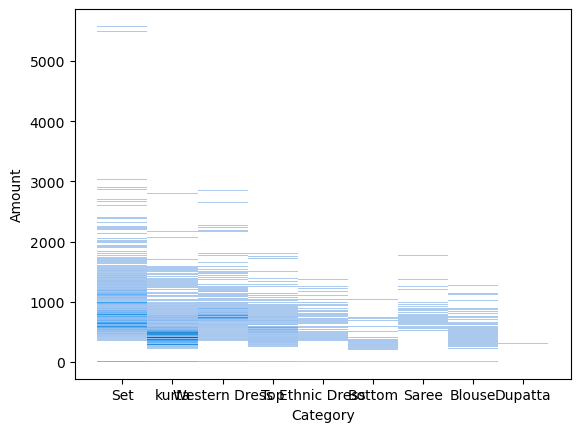

In [44]:
sns.histplot(data=df,x='Category',y='Amount')

In [50]:
df.groupby('Category')['Amount'].sum()

# paling banyak hasilnya ada di kurta

Category
Blouse             458408.18
Bottom             150667.98
Dupatta               915.00
Ethnic Dress       791217.66
Saree              123933.76
Set              39204124.03
Top               5347792.30
Western Dress    11216072.69
kurta            21299546.70
Name: Amount, dtype: float64

## QUESTION 3 : Channel Kontribusi Terbesar

In [60]:
df['Sales Channel ']

0         Amazon.in
1         Amazon.in
2         Amazon.in
3         Amazon.in
4         Amazon.in
            ...    
128970    Amazon.in
128971    Amazon.in
128972    Amazon.in
128973    Amazon.in
128974    Amazon.in
Name: Sales Channel , Length: 128975, dtype: object

In [62]:
df.groupby('Sales Channel ')['Amount'].sum()
# jadi yang paling banyak adalah Amazon

Sales Channel 
Amazon.in     78590257
Non-Amazon           0
Name: Amount, dtype: int64

### Hasil 
1. Cancel Rate Pesanan (14.21%)
2. Kategori Produk dengan Penjualan Tertinggi (Set & Kurta)
3. Kontribusi Penjualan per Sales Channel (Didominasi Amazon.in)


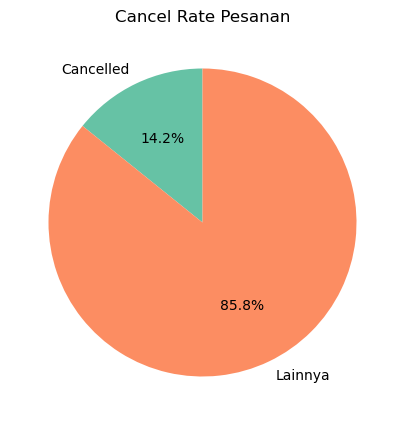

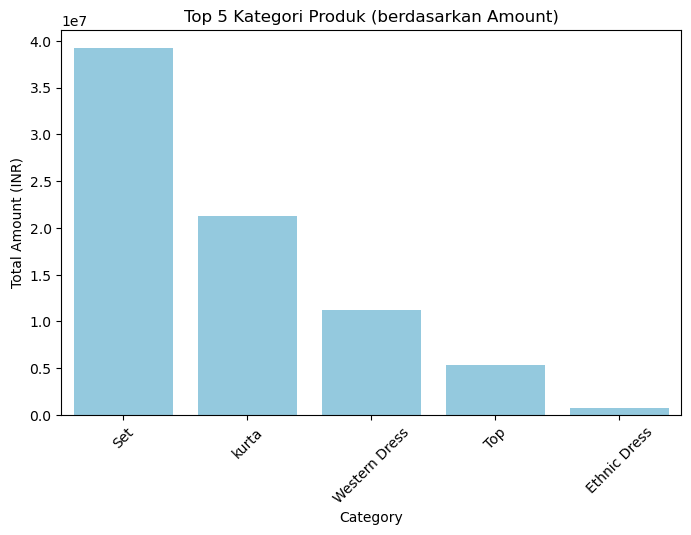

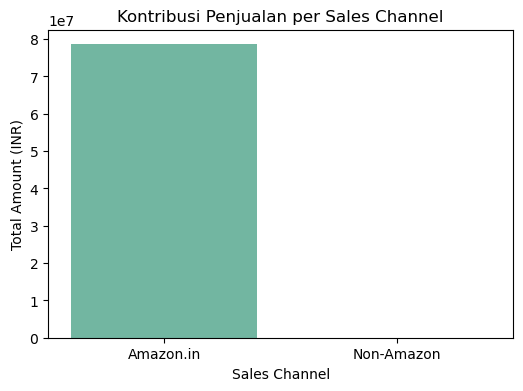

In [67]:

# 1. Visualisasi Cancel Rate (Pie)
cancel_counts = df['Status'].eq("Cancelled").sum()
non_cancel_counts = len(df) - cancel_counts

plt.figure(figsize=(5,5))
plt.pie([cancel_counts, non_cancel_counts], 
        labels=["Cancelled", "Lainnya"], 
        autopct="%.1f%%", startangle=90, colors=sns.color_palette("Set2"))
plt.title("Cancel Rate Pesanan")
plt.show()


# 2. Visualisasi Top Kategori (Bar) → langsung dari groupby
plt.figure(figsize=(8,5))
sns.barplot(x=cat_amount.index, y=cat_amount.values, color="skyblue")  # cukup 1 warna
plt.title("Top 5 Kategori Produk (berdasarkan Amount)")
plt.ylabel("Total Amount (INR)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

# 3. Visualisasi Sales Channel (Bar)
channel_amount = df.groupby('Sales Channel ')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=channel_amount.index, 
            y=channel_amount.values, 
            hue=channel_amount.index,  # pakai hue = x
            palette="Set2", 
            legend=False)
plt.title("Kontribusi Penjualan per Sales Channel")
plt.ylabel("Total Amount (INR)")
plt.xlabel("Sales Channel")
plt.xticks(rotation=0)
plt.show()
